<a href="https://colab.research.google.com/github/aksfasale/eda_hotel_booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOTEL BOOKING ANALYSIS**






# Problem Statement

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

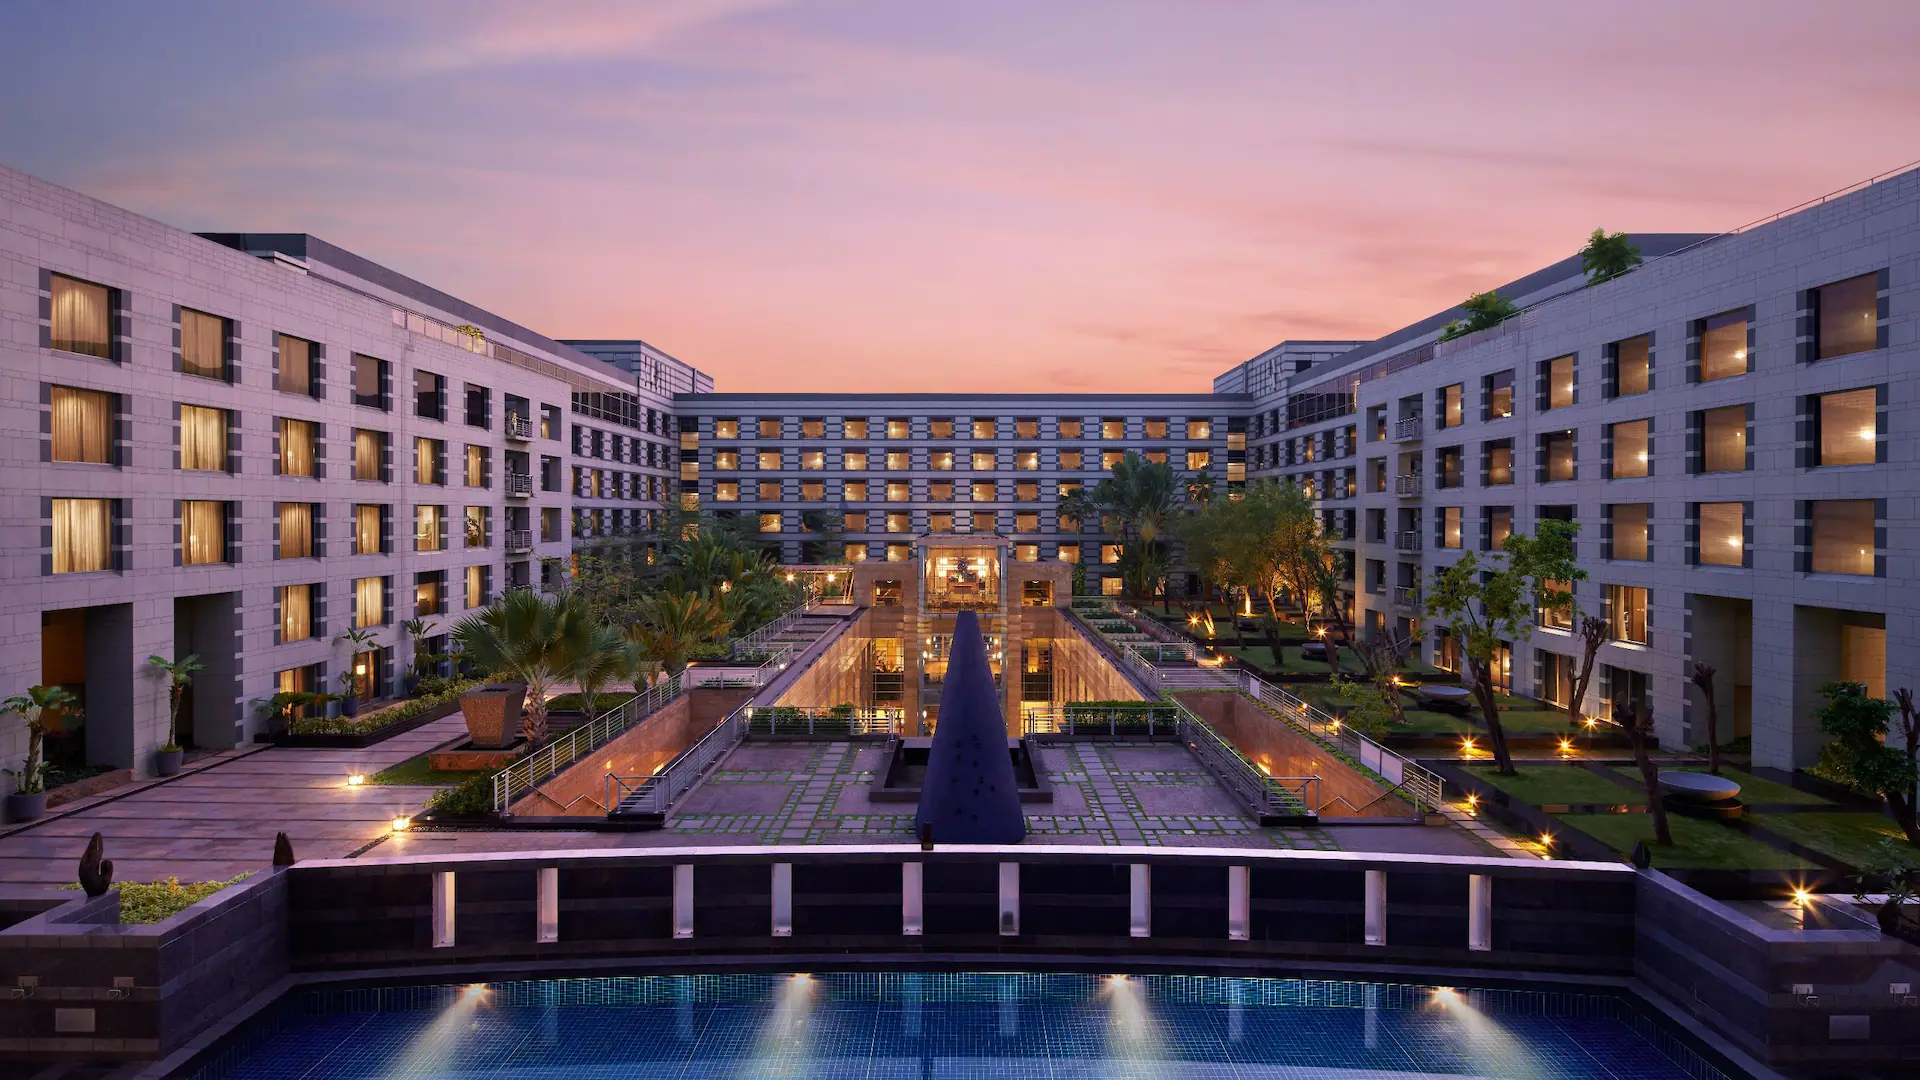

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Early Analysis, Data Reading 

In [70]:
hotel_booking_df = pd.read_csv('/content/drive/MyDrive/EDA - Hotel Booking Analysis/Hotel Bookings.csv')

In [71]:
hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [72]:
hotel_booking_df.shape

(119390, 32)

INFORMATION ABOUT HEAD

In [73]:
hotel_booking_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [74]:
hotel_booking_df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Getting the information about the dataset and checking the datatypes and the values present. Also finding wheather having null values or not.

In [75]:
hotel_booking_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Checking for null values and their count.

In [76]:
hotel_booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Creating New Copy and Making the required changes 

In [77]:
h_book_df = hotel_booking_df.copy()

# Data Preprocessing and Cleaning

In [78]:
h_book_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Renaming the column, with a meaningfull Name 

In [79]:
h_book_df.rename(columns ={'adr' : 'Average_daily_rate'},inplace =True)  

In [80]:
h_book_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [81]:
h_book_df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


Replacing the null values of agent, company and children.

In [82]:
#Replacing null values
h_book_df['children'].fillna(h_book_df.children.mean(), inplace = True)
h_book_df['children'] = h_book_df['children'].astype(int)    #converting the data type of children column to int
h_book_df['company'].fillna(0 , inplace = True)
h_book_df['company'].astype(int)                            #converting the data type of company column to int
h_book_df['agent'].fillna(0 , inplace = True)
h_book_df['agent'].astype(int)                               #converting the data type of agent column to int
h_book_df['country'].fillna('Other',inplace = True)

Checking for the Duplicate Rows and Removing them.

In [83]:
h_book_df.duplicated().value_counts()    

False    87396
True     31994
dtype: int64

In [84]:
h_book_df.drop_duplicates(inplace=True)

In [85]:
h_book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [86]:
h_book_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,...,NaN,81.004657,11.016809,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,...,NaN,109.945638,54.047484,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,0.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,9.000000,0.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,NaN,234.000000,0.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Here are some rows where the sum of the total number of adults, children, or babies is zero. The rows containing such information will be removed

In [87]:
h_book_df[h_book_df.adults + h_book_df.babies + h_book_df.children == 0].shape

(166, 32)

In [88]:
h_book_df.drop(h_book_df[h_book_df.adults + h_book_df.babies + h_book_df.children == 0].index, inplace = True)  #Removing rows where total is 0.

##Creating new columns

In [89]:
h_book_df["Total_members"] = h_book_df.adults + h_book_df.children + h_book_df.babies 

h_book_df["Total_stay"]= h_book_df.stays_in_weekend_nights + h_book_df.stays_in_week_nights

In [90]:
h_book_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  int64  
 11  babies                          87230 non-null  int64  
 12  meal                           

In [91]:
h_book_df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members,Total_stay
count,87230,87230.000000,87230.000000,87230.000000,87230,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,...,87230.000000,87230.000000,87230,87230.000000,87230.000000,87230.000000,87230,87230,87230.000000,87230.000000
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,3,926,NaN,NaN
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14,NaN,NaN
freq,53274,NaN,NaN,NaN,11242,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,71862,NaN,NaN,NaN,63221,211,NaN,NaN
mean,NaN,0.275238,79.971019,2016.210352,NaN,26.835091,15.815832,1.004609,2.623925,1.879365,...,10.984948,0.746291,NaN,106.518031,0.084306,0.698934,NaN,NaN,2.029107,3.628534
std,NaN,0.446637,86.058683,0.686064,NaN,13.669216,8.835545,1.027408,2.039830,0.621724,...,53.956668,10.001001,NaN,54.891227,0.281659,0.832051,NaN,NaN,0.790141,2.742948
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,1.000000,0.000000
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,NaN,72.250000,0.000000,0.000000,NaN,NaN,2.000000,2.000000
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,NaN,98.200000,0.000000,0.000000,NaN,NaN,2.000000,3.000000
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,0.000000,0.000000,NaN,134.100000,0.000000,1.000000,NaN,NaN,2.000000,5.000000


In [92]:
City_df =pd.DataFrame(h_book_df[h_book_df['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(h_book_df[h_book_df['hotel'] =='Resort Hotel'])

# Data and Information Visualization



### Removing an outlier from 'Average_daily_rate'

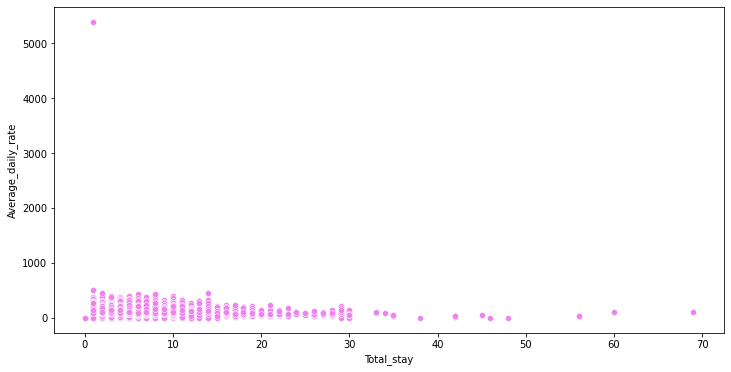

In [93]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Total_stay', data = h_book_df,color='violet')
plt.show()

Removing all values > 5000 

In [94]:
h_book_df.drop(h_book_df[h_book_df['Average_daily_rate'] > 5000].index, inplace = True) 

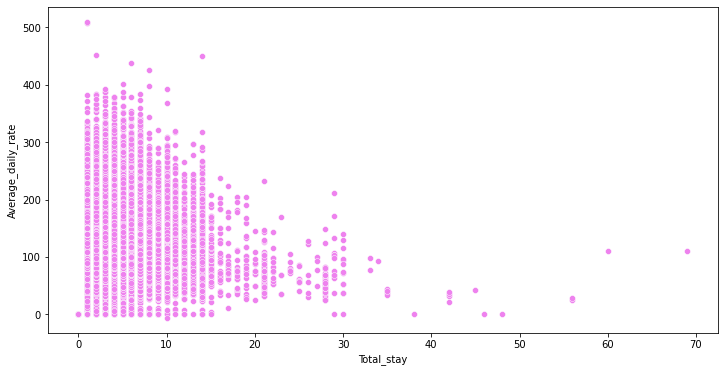

In [95]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Total_stay', data = h_book_df,color='violet')
plt.show()

From the scatter plot we can see that as length of Full_stay increases the Average_daily_rate decreases. This means for longer stay, the better deal for customer can be finalised.


## Correlation between the numerical data

To begin with, find a correlation between the numerical data. Additionally, we have added columns for Full_stay and Total_members. As a result, we can remove columns for adults, children, and babies, as well as stays_in_weekend_nights, and stays_in_weeknights.

In [96]:
Corel_df = h_book_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','Average_daily_rate','required_car_parking_spaces','total_of_special_requests','Total_stay','Total_members']]

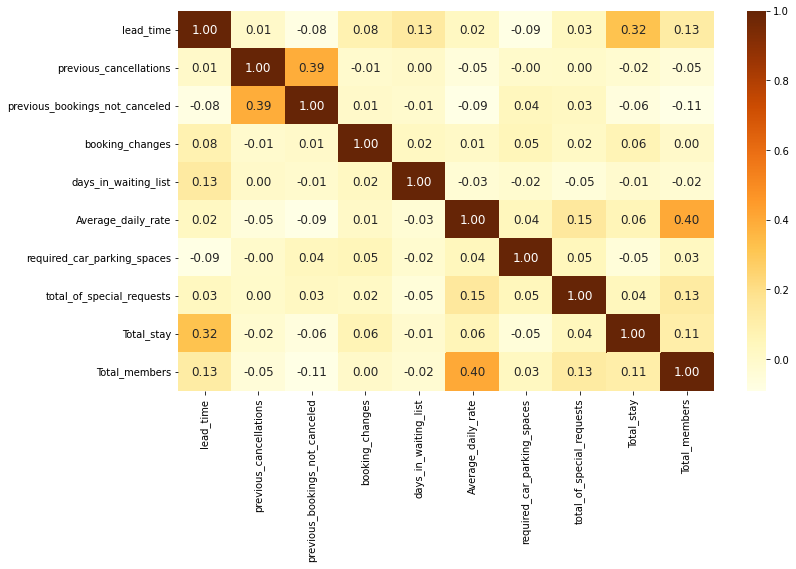

In [97]:
corr_mat = Corel_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,robust=True,annot = True,fmt='.2f',cmap='YlOrBr' ,annot_kws={'size':12},vmax=1,square=False);

1-->Full_stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2--> Average_daily_rate is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore more Average_daily_rate.

## Hotel Types ..!! and It's Percentage 

In [98]:
hotel_type =h_book_df['hotel'].value_counts()
hotel_type

City Hotel      53273
Resort Hotel    33956
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Hotel Type')

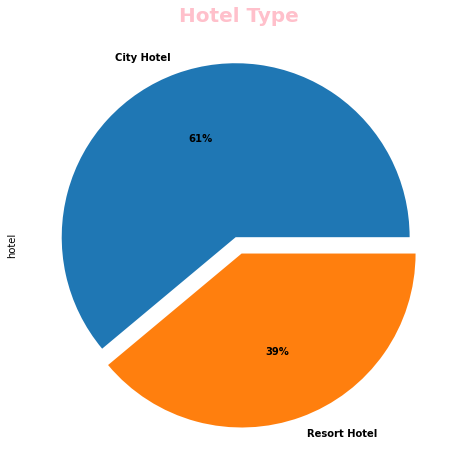

In [99]:
Hotel_ratio = hotel_type.plot.pie(x='City Hotel', y ='Resort Hotel',explode=[0.05, 0.05],autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(8,8)) 
plt.title('Hotel Type',color='Pink',fontweight='bold',size=20)

## Hotel Wise Bookings based on Month and year

Text(0, 0.5, 'Number of guest')

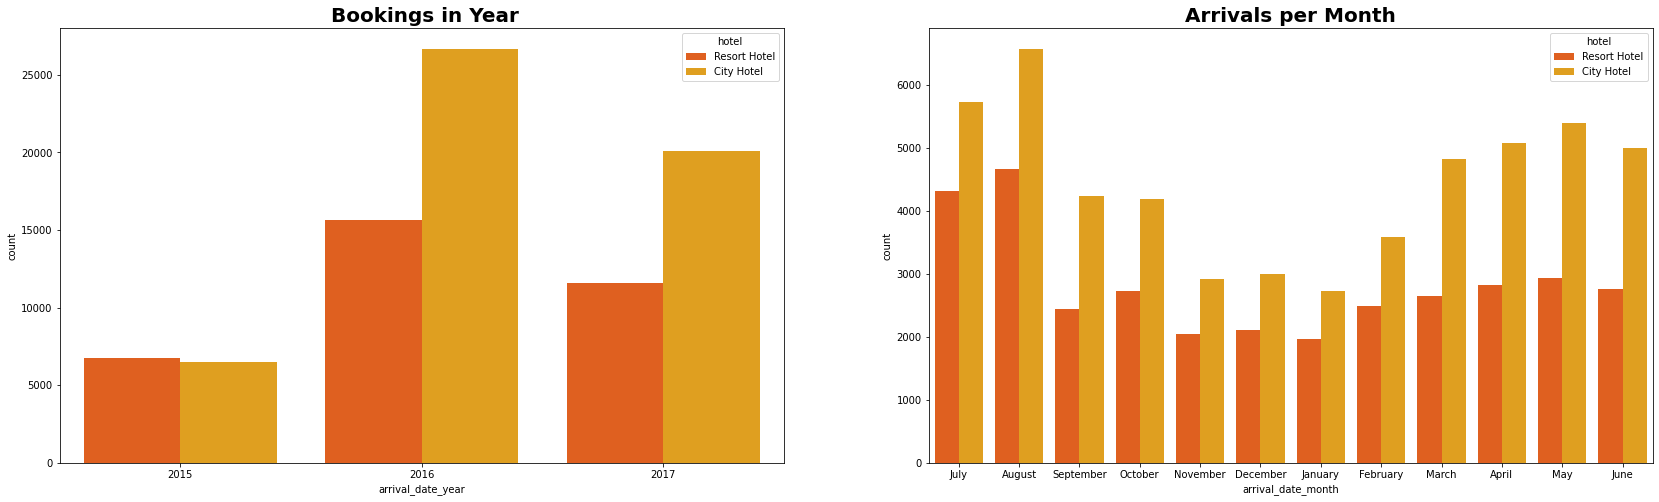

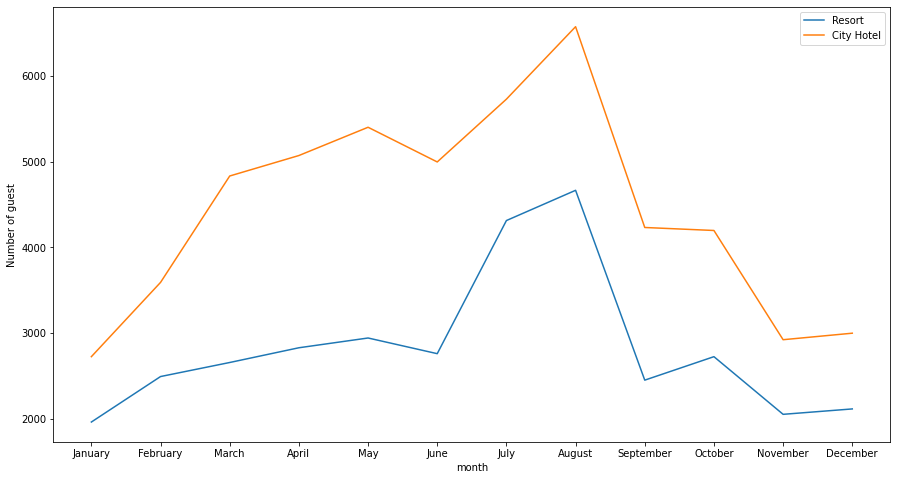

In [100]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1 )
sns.countplot(x= 'arrival_date_year', data= h_book_df,palette='autumn', hue= 'hotel').set_title (' Bookings in Year',fontweight="bold", size=20,)
plt.subplot(1,2,2)
sns.countplot(data = h_book_df, x = 'arrival_date_month',hue ='hotel',palette='autumn')
plt.title('Arrivals per Month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.6)

resort_guest = Resort_df['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = City_df['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)

#Which month get most visitors?
plt.figure(figsize =(15,8))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')

## Favourite Meal Type Preffered 

Text(0.5, 1.0, 'Favourite Meal Type')

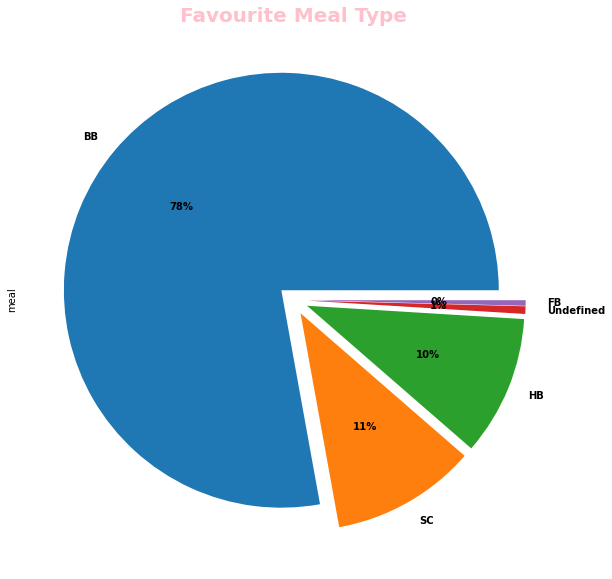

In [101]:
meal_typ =h_book_df['meal'].value_counts()
Food_type_ratio = meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(10,10),explode=[0.07, 0.07,0.07,0.07,0.07])
plt.title('Favourite Meal Type', color='Pink',fontweight='bold', size=20)

**BB-Bed and Breakfast**( in which breakfast included in the price of the hotel.).  **HB-Half Board** (in which dinner are included in the pricce of hotel). **FB--Full Board** (in which breakfast, lunch and dinner are included). **SC--Self Catering**( Meals not included in the price, but guests have access to the kitche, where they can prepare the meals on their own)

The most favourite meal, type is the one which **78%** of people prefer **'BB'** type meal.

## Country Wise - Number of Bookings

### Total Unique Countries 

In [102]:
h_book_df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 87229, dtype: object

### Selecting **Top 20 Countries**, with highest number of bookings and Visualization

In [103]:
h_book_df.country.value_counts().head(20)

PRT    27354
GBR    10424
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
USA     1871
CHE     1566
CN      1093
AUT      947
SWE      833
CHN      816
POL      764
RUS      559
NOR      515
ROU      458
Name: country, dtype: int64

Text(0.5, 1.0, 'Number of bookings - Country Wise(Top 20)')

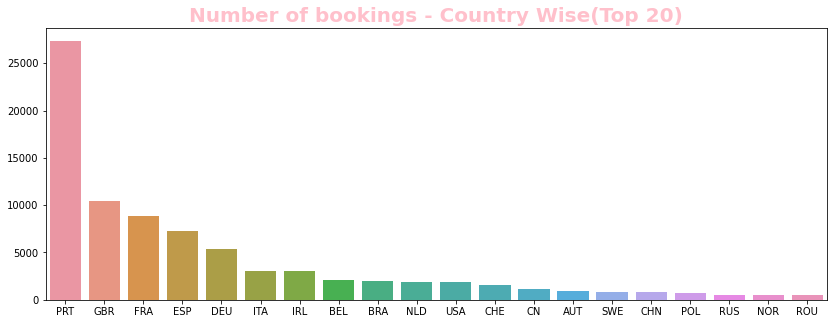

In [104]:
plt.figure(figsize = (14,5))
sns.barplot (y= list(h_book_df.country.value_counts().head (20)), x= list(h_book_df.country.value_counts().head(20).index))
plt.title("Number of bookings - Country Wise(Top 20)",fontweight="bold", size=20,color='Pink')

From the above graph, most guests are coming from 'PRT' i.e Portugal

Text(0.5, 1.0, 'required_parking_spaces')

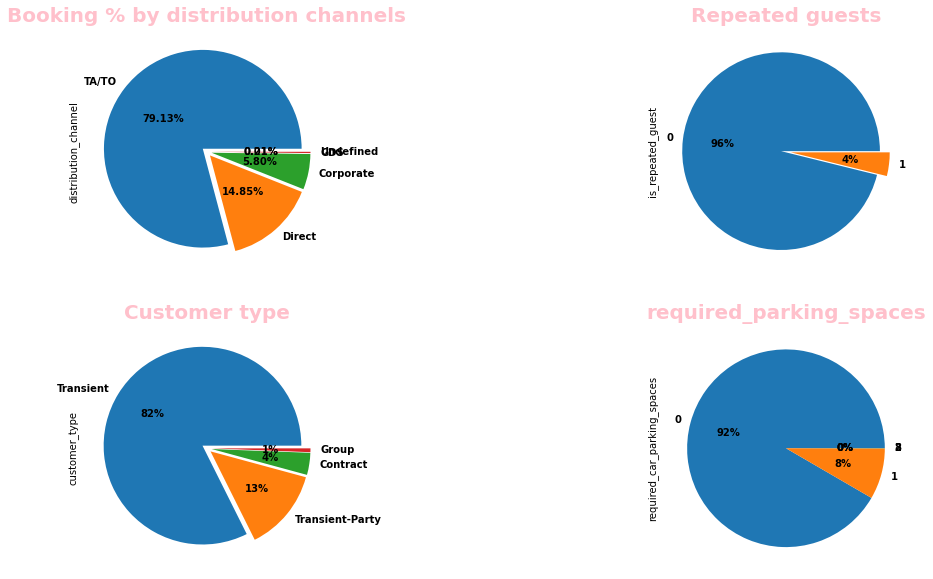

In [129]:
plt.figure(figsize =(15,15))
plt.subplot(2,2,1)
booking_distibution_typ =h_book_df['distribution_channel'].value_counts()
# plt.pie(x=h_book_df, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
booking_distributuion_type_ratio =booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'},figsize =(10,10), pctdistance=0.5,explode = [0.05]*5)
plt.title("Booking % by distribution channels",fontweight="bold", size=20,color='Pink');
plt.subplots_adjust(right=1.6)

plt.subplot(2,2,2)
Repeated = h_book_df.is_repeated_guest .value_counts()
Repeated.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*2)
plt.title('Repeated guests', fontweight ='bold', size =20,color='Pink');
plt.subplots_adjust(right=1.6)


plt.subplot(2,2,3 )
Customer_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode =[0.05]*4) 
plt.title('Customer type',fontweight="bold", size=20,color='Pink')
plt.subplots_adjust(right=1.6)

#---------------------------------------------------------------------------------------------------#
plt.subplot(2,2,4)
Car_parking_spaces = h_book_df.required_car_parking_spaces.value_counts()
Car_parking_spaces.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('required_parking_spaces',fontweight="bold", size=20,color='Pink')


### Agent Making Maximum Bookings ...???

Text(0.5, 1.0, 'Bookings Done by Agents')

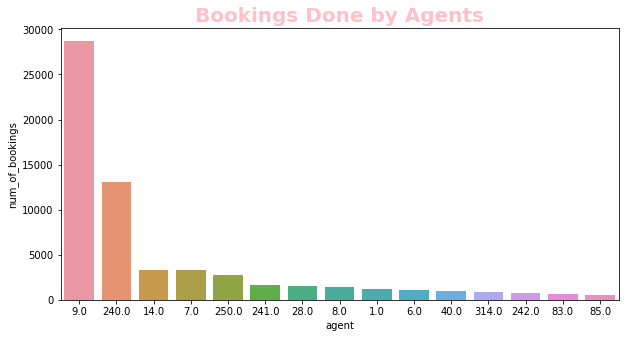

In [106]:
agnt_df = pd.DataFrame(h_book_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
agnt_df.drop(agnt_df[agnt_df['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
agnt_df = agnt_df[:15]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = agnt_df, order = agnt_df.sort_values('num_of_bookings' ,ascending = False).agent)
plt.title( 'Bookings Done by Agents',fontweight="bold", size=20,color='Pink')

Agent no. 9 has made most no. of bookings.

### Most Preferred Room Type

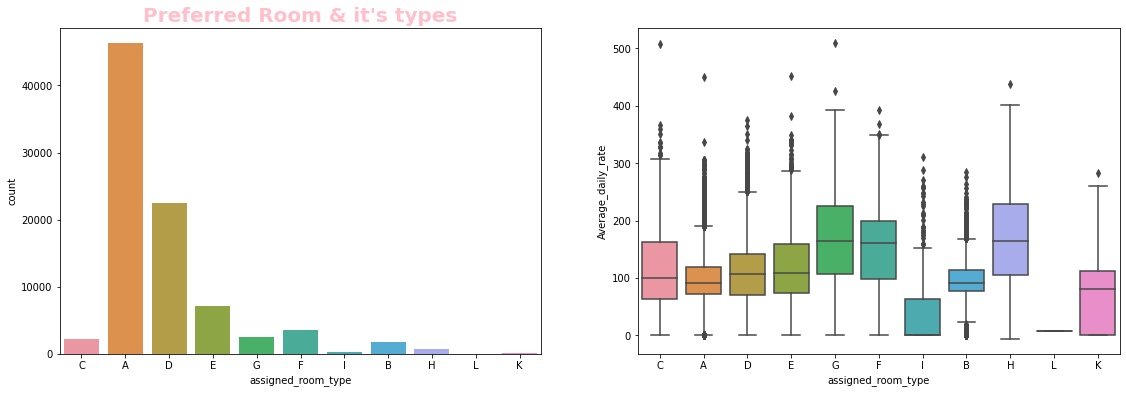

In [107]:

plt.figure(figsize = (19,6))
plt.subplot(1,2,1)
sns.countplot( x = h_book_df['assigned_room_type'])
plt.title("Preferred Room & it's types",fontweight="bold", size=20,color='Pink')
plt.subplot(1,2,2)
sns.boxplot(x = h_book_df['assigned_room_type'], y = h_book_df['Average_daily_rate'])

From the above Graph, 

---> It's clearly seen that the most people preferred Type A, types of room. Also the average daily rate of type A rooms seems to be less from the other graph.

---> Also, those whose average daily rate is higher i.e.(Type C,G,F,H) it's seen that preference is also less. 





In [122]:

#--------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------#

### Stay Length In Hotel

Text(0.5, 1.0, 'Stay Length in Hotels')

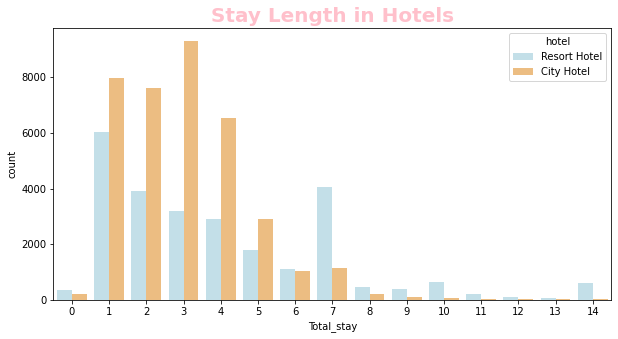

In [110]:
not_canceled = h_book_df[h_book_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Total_stay'], hue = s1['hotel'],palette='RdYlBu_r')
plt.title('Stay Length in Hotels',fontweight="bold", size=20,color='Pink')

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Text(0.5, 1.0, 'Number of stays on weekday nights')

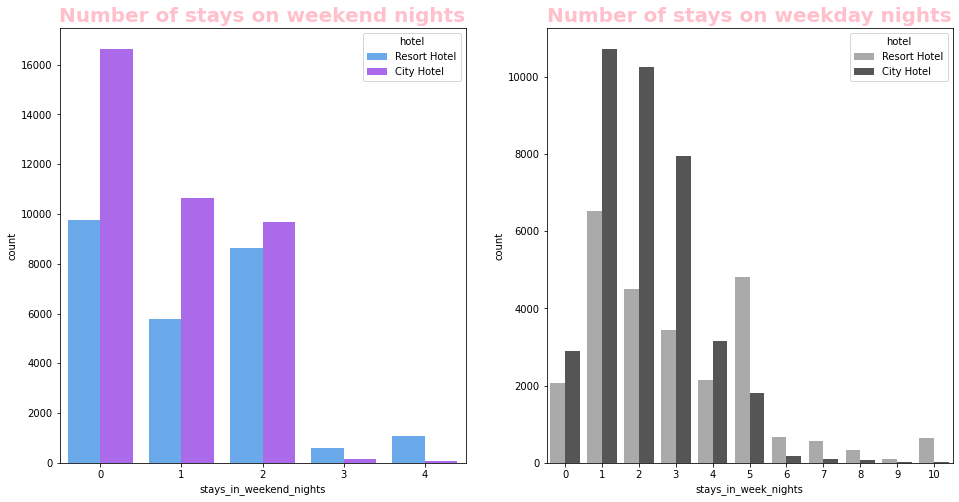

In [111]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
#s1 = ['stays_in_weekend_nights'] < 15
sns.countplot(x=s1['stays_in_weekend_nights'],hue='hotel', data=h_book_df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20,color='Pink')
plt.subplot(1, 2, 2)
sns.countplot(x=s1['stays_in_week_nights'],hue='hotel', data=h_book_df, palette='binary')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20,color='Pink')

### Cancellation rates

Text(0.5, 1.0, 'Booking Preferred with Deposite Type')

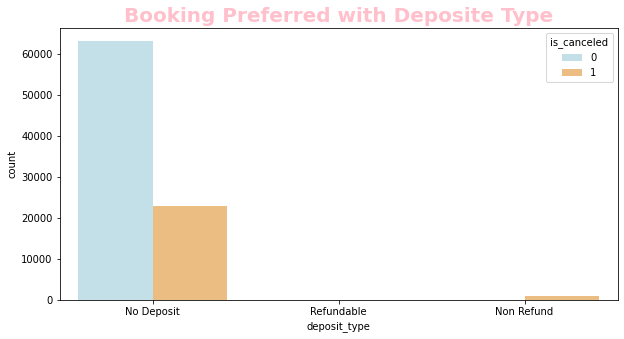

In [112]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=h_book_df,hue ='is_canceled',palette='RdYlBu_r')
plt.title('Booking Preferred with Deposite Type',fontweight="bold", size=20,color='Pink') 

As expected , Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings

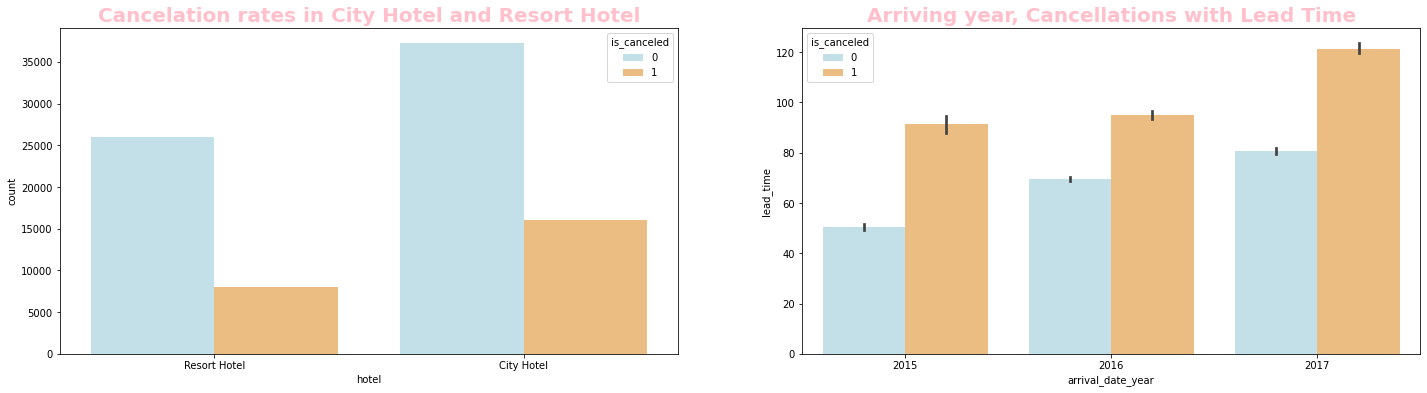

In [113]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.countplot(x='hotel',hue="is_canceled",data=h_book_df,palette='RdYlBu_r')
plt.title("Cancelation rates in City Hotel and Resort Hotel",fontweight="bold", size=20,color='Pink')
plt.subplot(1,2,2)
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= h_book_df, palette='RdYlBu_r')
plt.title('Arriving year, Cancellations with Lead Time',fontweight="bold", size=20,color='Pink')
plt.subplots_adjust(right=1.7)

Cancelation rate is higher in city hotel. With lead time more than 100 there is more possibility of cancellation. 

# Average_daily_rate and price

Text(0.5, 1.0, 'Average daily rate month wise')

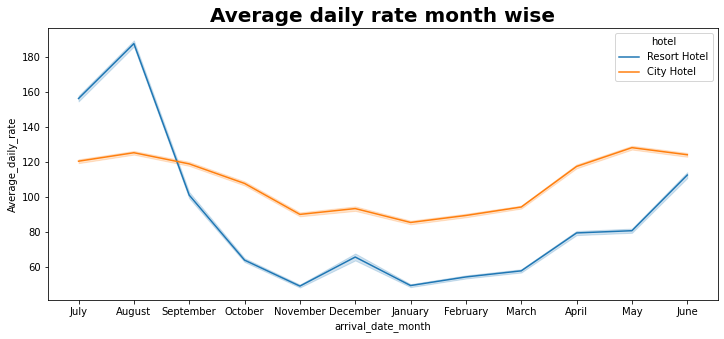

In [114]:
plt.figure(figsize=(12,5))

sns.lineplot(data = h_book_df, x = 'arrival_date_month', y = 'Average_daily_rate', hue = 'hotel',sort =True)
plt.title('Average daily rate month wise',fontweight ='bold',size =20)

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


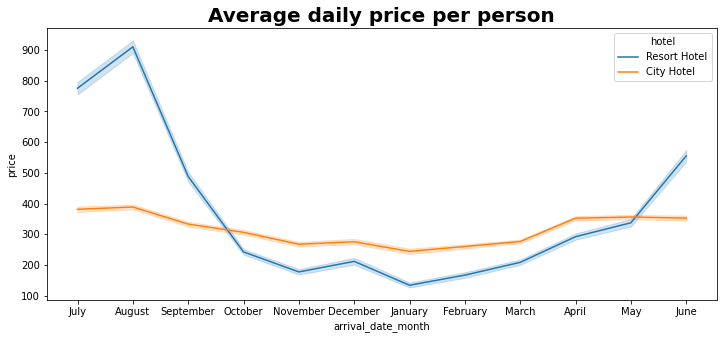

In [115]:
plt.figure(figsize=(12,5))
# Calculating average daily rate per person
h_book_df['Average_Daily_rate_pp'] = h_book_df['Average_daily_rate'] / (h_book_df['adults'] + h_book_df['children']) 
Actual_guests = h_book_df.loc[h_book_df["is_canceled"] == 0]
Actual_guests['price'] = Actual_guests['Average_daily_rate'] * (Actual_guests['Total_stay'])
sns.lineplot(data = Actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.title('Average daily price per person',fontweight ='bold', size =20)
plt.show()

Prices of resort hotel are much higher.

Prices of city hotel do not fluctuate that much.

### Special Request 

In [116]:
h_book_df['total_of_special_requests'].value_counts()

0    43788
1    28976
2    11795
3     2314
4      320
5       36
Name: total_of_special_requests, dtype: int64

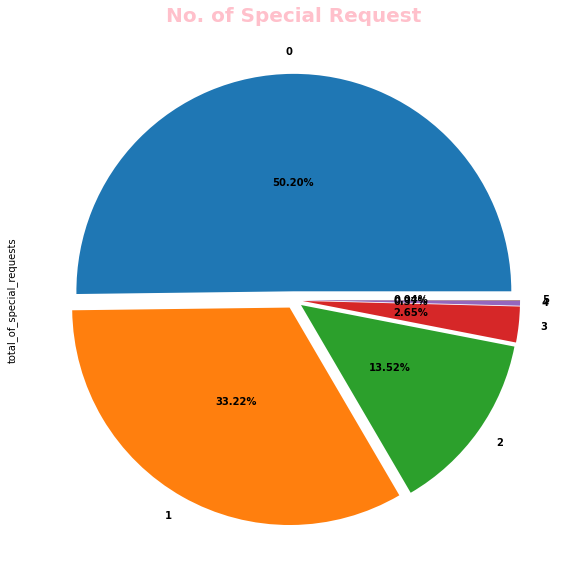

In [117]:
special_request_typ =h_book_df['total_of_special_requests'].value_counts()
special_request =special_request_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'},figsize =(10,10), pctdistance=0.5,explode = [0.04]*6)
plt.title("No. of Special Request",fontweight="bold", size=20,color='Pink');

In [118]:


h_book_df.Total_members.sum()

176997

In [119]:
h_book_df.required_car_parking_spaces.sum()

7354

7354 car Parking spaces have been used

### Project Summary

The majority of guests come from western europe countries.We should spend a significant amount of our budget on those area.

the majority of reservations are for city hotels.

Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.

We also realise that the high rate of cancellations can be due high no deposit policies.

We should also target months between May to Aug. Those are peak months due to the summer period.

Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

80% distribution_channel is TA/TO

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

November,Descember, February And January are the months which has less booking so in this perios you can get rooms with less average daily rate. And Avoid most busiest months for hotels (May,June,July,August)